# `BUILDING A ML MODEL TO PREDICT CUSTOMER CHURN` 
#### Using the CRISP-DM framework


## `Business Understanding`


#### Goal/Description
To create a machine learning model to predict the likelihood of retaining a customer

#### `Null Hypothesis`
There is no relationship between a tech savy customer and the customer retention

#### `Alternate Hypothesis`
There is a relationship between a tech savy customer and the customer retention

#### `Analytical Questions`
- How does tenure and monthly charge affect customer churn?
- What is the likelihood of a customer with online security and protection to churn?
- What is the relationship between the type of contract and the likelihood of a customer churn?
- Do customers with dependents and internet security likely to Churn?

## `Data Understanding`

#### Data Source
The data was sourced from a Telecommunication company and divided into three (3) parts :
- 3000 rows as the training data
- 2000 rows as the evaluation data 
- 2000 rows as the test data 

### `Issues`
- Some columns have multiple adjectives of the same word. eg no,no internet service,false 


#### Data Exploration

##### `Libraries`

In [106]:
import pyodbc    
from dotenv import dotenv_values
import pandas as pd
import sqlalchemy as sa
import numpy as np
from scipy import stats 
from scipy.stats import kruskal
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, RobustScaler,MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 

warnings.filterwarnings('ignore')

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
ODBC_Driver_18_for_SQL_server = environment_variables.get("DRIVER")

In [4]:
#Connecting to the database
connection_string = f"DRIVER={{ODBC Driver 18 for SQL server}};SERVER={server};DATABASE={database};UID={username};PWD={password};"

In [5]:
connection = pyodbc.connect(connection_string)

In [6]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
df_lp2=pd.read_csv('LP2_Telco-churn-second-2000(1).csv')

In [8]:
df_lp2.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     5600-PDUJF    Male              0      No         No       6   
1     8292-TYSPY    Male              0      No         No      19   
2     0567-XRHCU  Female              0     Yes        Yes      69   
3     1867-BDVFH    Male              0     Yes        Yes      11   
4     2067-QYTCF  Female              0     Yes         No      64   
...          ...     ...            ...     ...        ...     ...   
2038  6840-RESVB    Male              0     Yes        Yes      24   
2039  2234-XADUH  Female              0     Yes        Yes      72   
2040  4801-JZAZL  Female              0     Yes        Yes      11   
2041  8361-LTMKD    Male              1     Yes         No       4   
2042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             Yes                No             DSL   

In [9]:
# Transpose the data
transposed_data = df_lp2 # or transposed_data = data.transpose()

# Display transposed data
print(transposed_data)
df_lp2.head(4)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     5600-PDUJF    Male              0      No         No       6   
1     8292-TYSPY    Male              0      No         No      19   
2     0567-XRHCU  Female              0     Yes        Yes      69   
3     1867-BDVFH    Male              0     Yes        Yes      11   
4     2067-QYTCF  Female              0     Yes         No      64   
...          ...     ...            ...     ...        ...     ...   
2038  6840-RESVB    Male              0     Yes        Yes      24   
2039  2234-XADUH  Female              0     Yes        Yes      72   
2040  4801-JZAZL  Female              0     Yes        Yes      11   
2041  8361-LTMKD    Male              1     Yes         No       4   
2042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             Yes                No             DSL             No  ...   
1        

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes


Customer Churn Prediction-Vodafone 

Problem solving: Vodafone, a telecommunications network, prioritizes addressing customer churn and exploring methods to retain its customer base, recognizing the impact on both profits and company growth. To tackle this challenge, the project is leveraging machine learning for the analysis and prediction of customer churn.

Goal: To Build a machine learning model that can predict churn.

Analytical Questions
1.What is the relationship between the monthly charges and churn?
2. How do Phone service and churn and phone service relate.
3.Does the type of internet service affect churn

Hypothesis
Null hypothesis: There is no significant relation between TotalCharges and customer churn.
Alternate Hypoyhesis: There is a significant relation between TotalCharges and customer churn.


DATA UNDERSTANDING

In [10]:


#Concatenate data into a single dataframe
concatenated_data = pd.concat([df_lp2,data], ignore_index=True)

In [11]:
#concatenate data into one csv file
concatenated_data. to_csv('alldata.csv')

In [12]:
# Define data
Telcodata=pd.read_csv('alldata.csv')

In [13]:
Telcodata.head(15)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
5,5,2359-QWQUL,Female,0,Yes,No,39,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.70,4134.85,Yes
6,6,9103-TCIHJ,Female,0,No,No,15,Yes,Yes,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.70,899.8,Yes
7,7,7407-SUJIZ,Male,0,No,No,25,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.5,No
8,8,9150-KPBJQ,Female,0,No,No,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,116.85,No
9,9,0052-DCKON,Male,0,Yes,No,66,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),115.80,7942.15,No


In [14]:
#Checking For duplicates
Telcodata.duplicated().sum()

0

In [15]:
#Checking the datatypes of the columns
datatypes = Telcodata.dtypes
datatypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Converting the TotalCharges datatype to float64

In [16]:
#Converting TotalCharges column to numeric
Telcodata['TotalCharges'] = pd.to_numeric(Telcodata['TotalCharges'], errors='coerce')
Telcodata=Telcodata.reset_index()

In [17]:
# Check for empty fields
empty_fields = Telcodata.isnull().sum()

# Display the count of empty fields for each column
print(empty_fields)

index                 0
Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64


##### Replacing all negatives with False and positives with True

In [18]:
Telcodata.replace(['No','No internet service','false','No phone service'], "False", inplace=True)

Telcodata.replace('Yes',"True", inplace=True)

In [19]:
Telcodata['SeniorCitizen'] = np.where(Telcodata['SeniorCitizen'] == 1, True, False)


In [20]:
Telcodata.InternetService.replace('false','None')

0               DSL
1               DSL
2               DSL
3       Fiber optic
4       Fiber optic
           ...     
5038            DSL
5039            DSL
5040    Fiber optic
5041    Fiber optic
5042          False
Name: InternetService, Length: 5043, dtype: object

In [21]:
datatypes = Telcodata.dtypes
datatypes

index                 int64
Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

##### Making the True/False to Boolean

In [22]:
Telcodata.replace({'True': True, 'False': False}, inplace=True)

In [23]:
Telcodata.isna().sum()

index                 0
Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [24]:

#Dropping the index column


Telcodata.reset_index(drop=True, inplace=True)


Telcodata.drop(Telcodata.columns[0], axis=1, inplace=True)

print(Telcodata.head())


   Unnamed: 0  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           0  5600-PDUJF    Male          False    False       False       6   
1           1  8292-TYSPY    Male          False    False       False      19   
2           2  0567-XRHCU  Female          False     True        True      69   
3           3  1867-BDVFH    Male          False     True        True      11   
4           4  2067-QYTCF  Female          False     True       False      64   

   PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          True         False             DSL  ...            False   
1          True         False             DSL  ...             True   
2         False         False             DSL  ...             True   
3          True          True     Fiber optic  ...            False   
4          True          True     Fiber optic  ...             True   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       

In [25]:
# Transpose the data
transposed_data = Telcodata # or transposed_data = data.transpose()

# Display transposed data
print(transposed_data)
Telcodata.head(4)

      Unnamed: 0          customerID  gender  SeniorCitizen  Partner  \
0              0          5600-PDUJF    Male          False    False   
1              1          8292-TYSPY    Male          False    False   
2              2          0567-XRHCU  Female          False     True   
3              3          1867-BDVFH    Male          False     True   
4              4          2067-QYTCF  Female          False     True   
...          ...                 ...     ...            ...      ...   
5038        5038          2209-XADXF  Female          False    False   
5039        5039          6620-JDYNW  Female          False    False   
5040        5040          1891-FZYSA    Male           True     True   
5041        5041          4770-UEZOX    Male          False    False   
5042        5042  1A1:U3001038-RQOST    Male          False     True   

      Dependents  tenure  PhoneService MultipleLines InternetService  ...  \
0          False       6          True         False      

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,5600-PDUJF,Male,False,False,False,6,True,False,DSL,...,False,True,False,False,Month-to-month,True,Credit card (automatic),49.50,312.7,False
1,1,8292-TYSPY,Male,False,False,False,19,True,False,DSL,...,True,True,False,False,Month-to-month,True,Credit card (automatic),55.00,1046.5,True
2,2,0567-XRHCU,Female,False,True,True,69,False,False,DSL,...,True,False,False,True,Two year,True,Credit card (automatic),43.95,2960.1,False
3,3,1867-BDVFH,Male,False,True,True,11,True,True,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,74.35,834.2,True


In [26]:
Telcodata.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,5600-PDUJF,Male,False,False,False,6,True,False,DSL,...,False,True,False,False,Month-to-month,True,Credit card (automatic),49.50,312.7,False
1,1,8292-TYSPY,Male,False,False,False,19,True,False,DSL,...,True,True,False,False,Month-to-month,True,Credit card (automatic),55.00,1046.5,True
2,2,0567-XRHCU,Female,False,True,True,69,False,False,DSL,...,True,False,False,True,Two year,True,Credit card (automatic),43.95,2960.1,False
3,3,1867-BDVFH,Male,False,True,True,11,True,True,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,74.35,834.2,True
4,4,2067-QYTCF,Female,False,True,False,64,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Electronic check,111.15,6953.4,False


In [27]:
Telcodata.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5043.0,2521.000000,1455.933034,0.000000,1260.500000,2521.000000,3781.500000,5042.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


Univariate Analysis


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

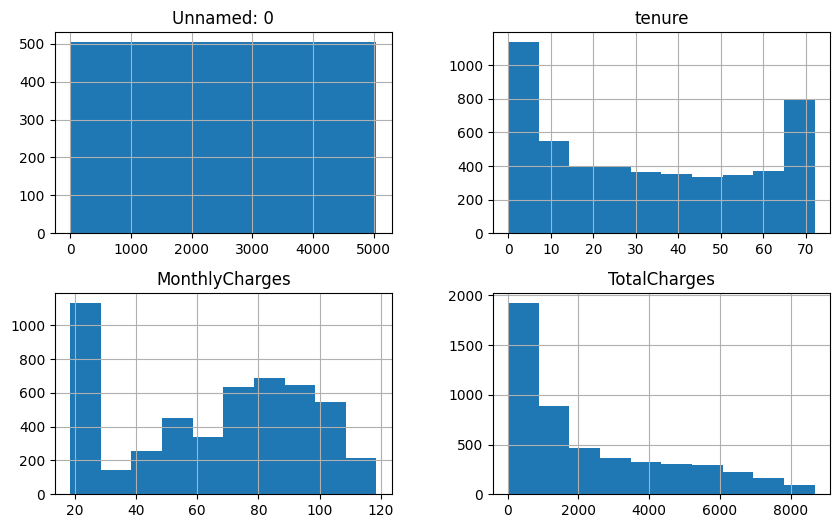

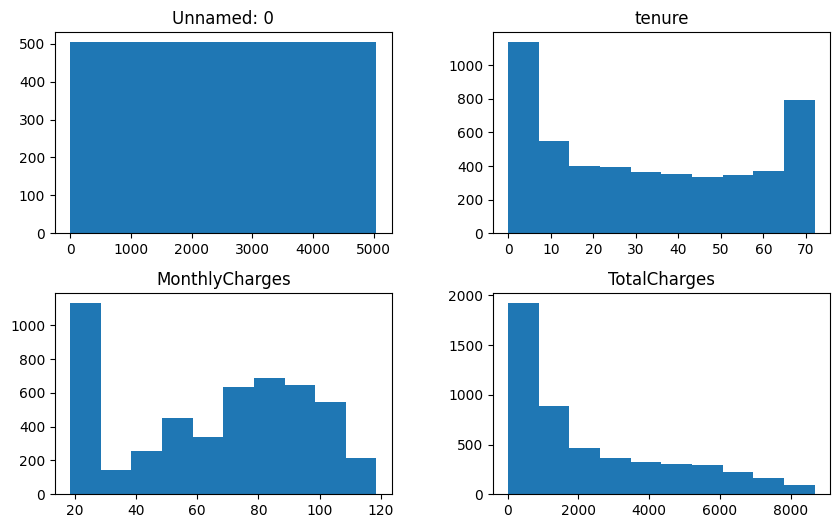

In [28]:
Telcodata.hist(figsize=(10,6))
Telcodata.hist(figsize=(10,6), grid = False)

In [29]:
# Visualize the distribution of categorical columns
categoricals = [column for column in Telcodata.columns if Telcodata[column].dtype == "O"]
for column in categoricals:
        if column not in ['customerID']:
                fig = px.histogram(Telcodata, x=Telcodata[column], text_auto=True,color=column,
                               title=f"Distribution of customers based on {column}")
                fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', xaxis_tickangle=-45)
                fig.show()


#### OBSERVATION ON UNIVARIATE ANALYSIS
- The Gender is evenly distributed 
- Over 50% of all contract types are month-on-month basis
- Electronic Check is the most used,covering 30% of all payment methods   
-Fibre Optic is the preferred internet service.

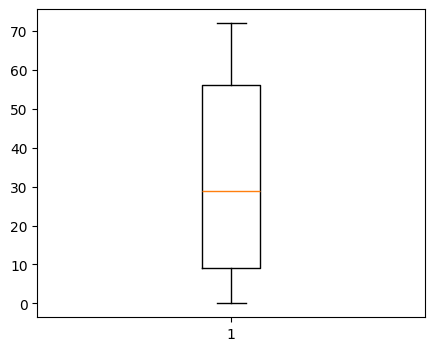

In [30]:
fig = plt.figure(figsize =(5, 4))
 
# Creating plot
plt.boxplot(Telcodata.tenure)
plt.show()

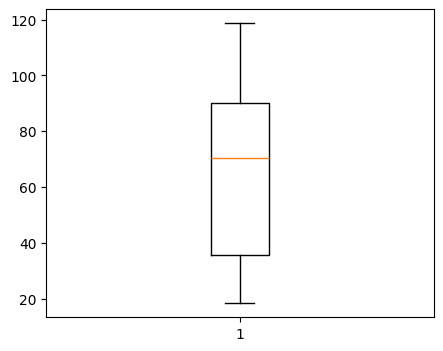

In [31]:
fig = plt.figure(figsize =(5, 4))
 
# Creating plot
plt.boxplot(Telcodata.MonthlyCharges)
plt.show()

### Bivariate Analysis

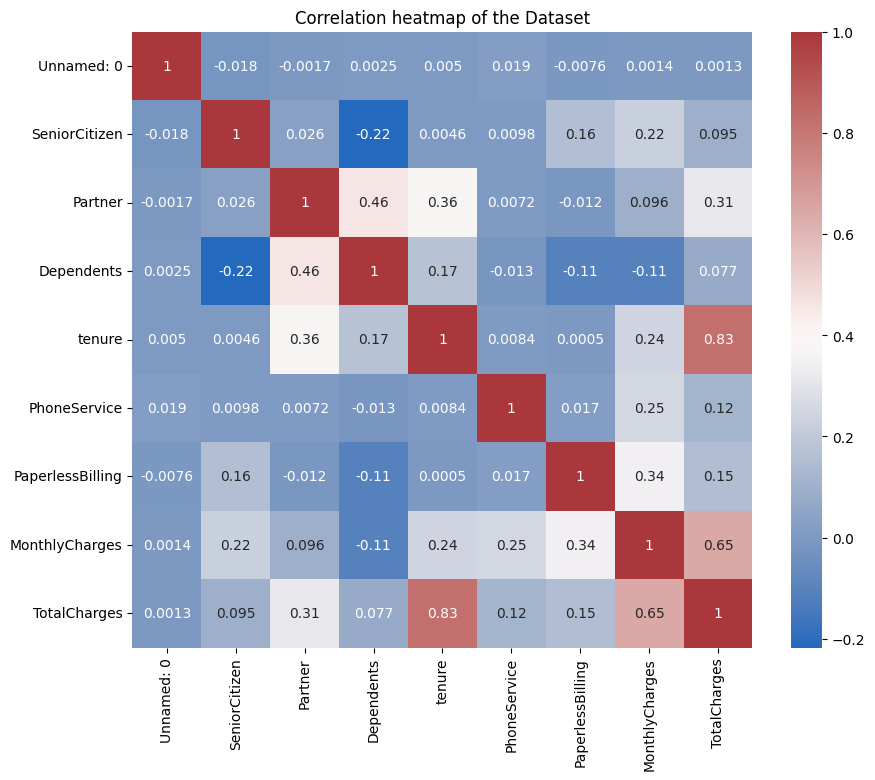

In [32]:
# Summarizing the relationships between the variables with a heatmap of the correlations
correlation_matrix = Telcodata.corr(numeric_only= True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='vlag')
plt.title("Correlation heatmap of the Dataset")
plt.show()

Addressing QUESTIONS



##### `How does tenure and monthly charge affect customer churn?`


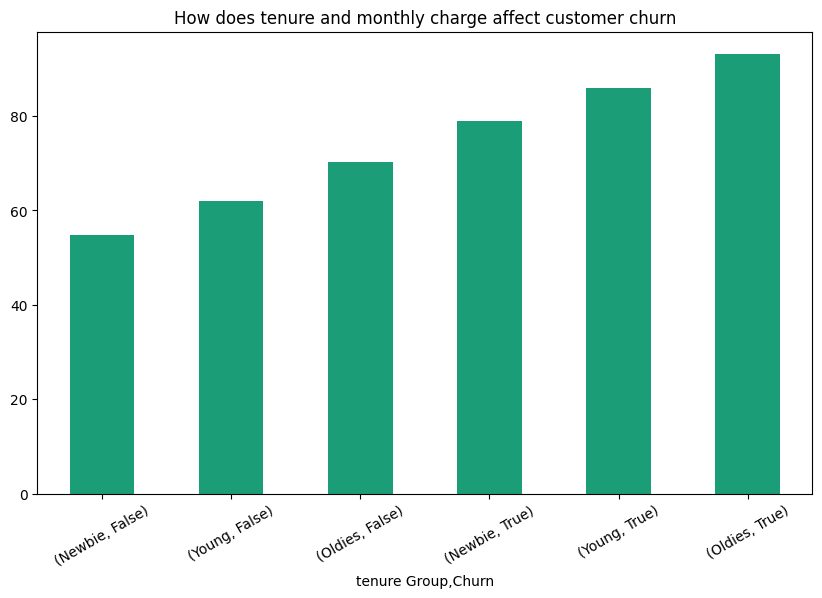

In [33]:

bins = [ 10, 30, 50,70]
df=Telcodata
labels = ['Newbie', 'Young', 'Oldies']
df['tenure Group'] = pd.cut(df['tenure'], bins=bins, labels=labels)
streamers = Telcodata.groupby(['tenure Group','Churn'])['MonthlyCharges'].mean().sort_values(ascending=True)
#sns.displot(streamers, x="tenure Group",hue="Churn", element="step")
streamers.plot(kind='bar', title = 'How does tenure and monthly charge affect customer churn', figsize = (10,6), cmap='Dark2', rot = 30);
#streamers.plot(kind='bar')
plt.show()


#### OBSERVATION
- New,Existing and Old Customers with higher charges for software usage are the ones churning.
- There has to be a loyalty promotion for old customers to lock in the old customers.
- There can also be a signup discount to new customers to lock them in on the software.

##### `What is the likelihood of a customer with online security and device protection to churn?`


<Axes: title={'center': 'The likelihood of a customer with online security and device protection to churn'}, xlabel='OnlineSecurity,DeviceProtection'>

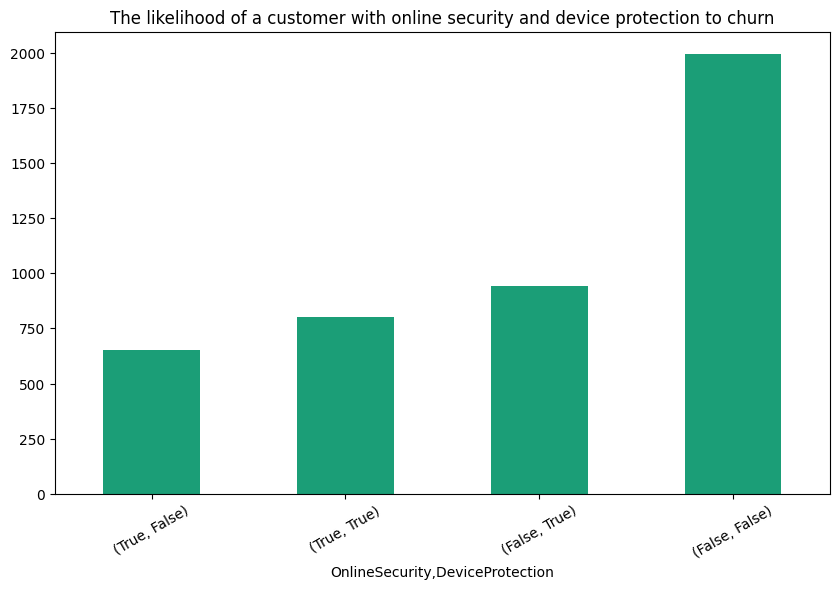

In [34]:
cust_retention = Telcodata.groupby(['OnlineSecurity','DeviceProtection'])['Churn'].count().sort_values(ascending=True)
cust_retention.plot(kind='bar', title = 'The likelihood of a customer with online security and device protection to churn', figsize = (10,6), cmap='Dark2', rot = 30)

#### OBSERVATION
- Customers with no security at all are more likely to Churn. 
- Basic cybersecurity can be done to curb customer doubt to reduce Churn.

#### `What is the relationship between the type of contract and the likelihood of a customer churn?`


<Axes: title={'center': 'The relationship between the type of contract and the likelihood of a customer churn'}, xlabel='Contract'>

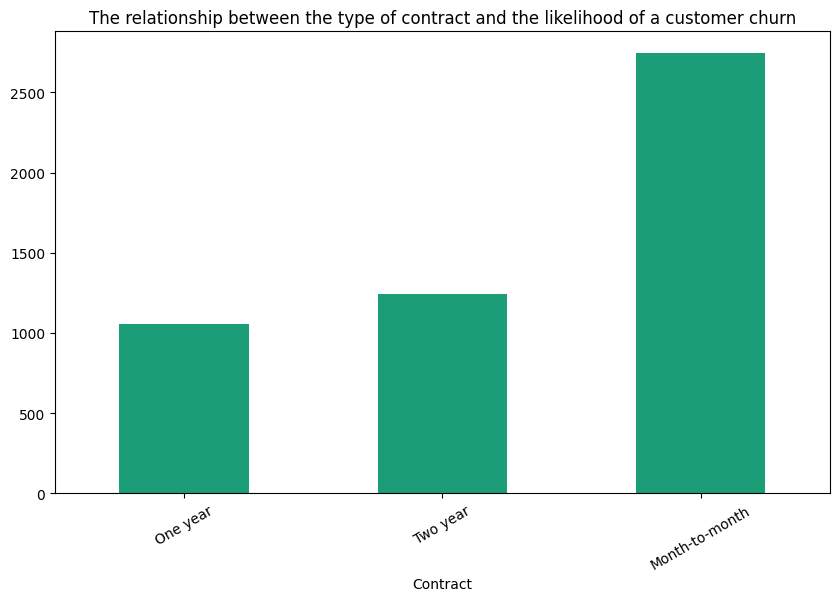

In [35]:
cust_contract = Telcodata.groupby('Contract')['Churn'].count().sort_values(ascending=True)
cust_contract.plot(kind='bar', title = 'The relationship between the type of contract and the likelihood of a customer churn', figsize = (10,6), cmap='Dark2', rot = 30)

#### OBSERVATION
- Month-to-Month Customers are more likely to churn as they are likely to be floating users.

#### `Do customers with dependents and internet security likely to Churn?`

<Axes: title={'center': 'Do customers with dependents and internet security likely to Churn?'}, xlabel='OnlineSecurity,Dependents'>

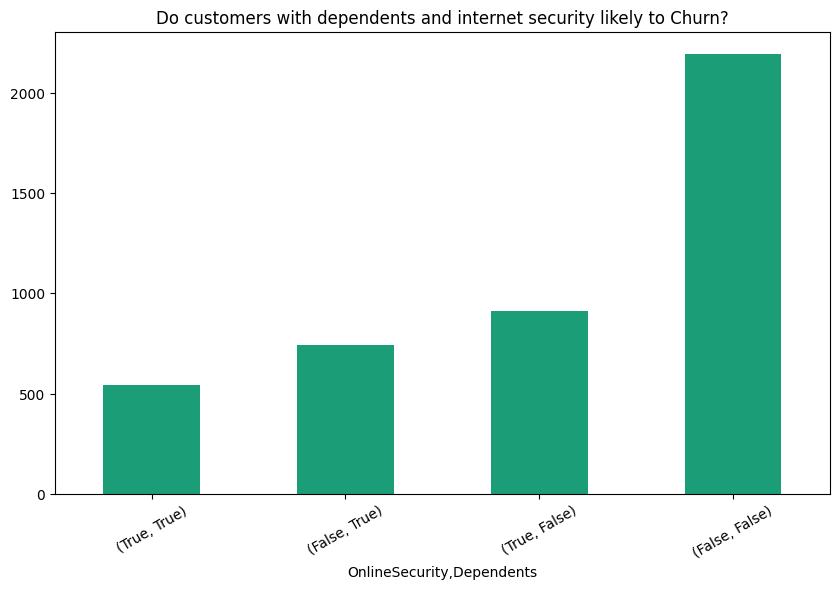

In [36]:
cust_contract = Telcodata.groupby(['OnlineSecurity','Dependents'])['Churn'].count().sort_values(ascending=True)
cust_contract.plot(kind='bar', title = 'Do customers with dependents and internet security likely to Churn?', figsize = (10,6), cmap='Dark2', rot = 30)

#### OBSERVATION
Customers with both Online Security and Dependents are less likely to churn.

In [37]:
Telcodata.isnull().sum()


Unnamed: 0             0
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           8
Churn                  1
tenure Group        1764
dtype: int64

In [38]:
#Dropping Empty rows
Telcodata = Telcodata.dropna(subset=['OnlineSecurity','OnlineBackup','DeviceProtection','MultipleLines','TotalCharges','Churn'],axis=0)

In [39]:
#finding duplicates
duplicate = Telcodata[Telcodata.duplicated()]
duplicate.shape

(0, 23)

### OBSERVATION
0 Duplicates seen

#### `HYPOTHESIS`

In [40]:
#Checking Normality of the data 

def check_normality(data,name):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.20f" % p_value_normality)
    if p_value_normality <0.05:
        print(f"Reject null hypothesis >> The data for {name} is not normally distributed")
    else:
        print(f"Fail to reject null hypothesis >> The data for {name} is normally distributed")

In [41]:

#Hypoyhesis
online = Telcodata.loc[Telcodata['OnlineSecurity'] == True]  # Assuming 'OnlineSecurity' column contains True/False values
device = Telcodata.loc[Telcodata['DeviceProtection'] == True]  # Assuming 'DeviceProtection' column contains True/False values
df_tech = Telcodata.loc[(Telcodata['OnlineSecurity'] == True) & (Telcodata['DeviceProtection'] == True)]


In [42]:
#Normality Checks
check_normality(df_tech.TotalCharges,'Online Security and Device Protection')
check_normality(online.TotalCharges,'Online Security')
check_normality(device.TotalCharges,'Device Protection')

p value:0.00000000001746254682
Reject null hypothesis >> The data for Online Security and Device Protection is not normally distributed
p value:0.00000000000000000142
Reject null hypothesis >> The data for Online Security is not normally distributed
p value:0.00000000000000000001
Reject null hypothesis >> The data for Device Protection is not normally distributed


In [43]:
#Using the P-Levene to test the Hypothesis
stat, pvalue_levene= stats.levene(df_tech.TotalCharges, online.TotalCharges,device.TotalCharges )

print("p value:%.10f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0001300041
Reject null hypothesis >> The variances of the samples are different.


##### Observation 
- Data samples are not normally distributed
- The variances of the samples are different
- Therefore a Non-Parametric test must be done (Kruskal Test)

In [44]:
#Kruskal Test

stat, p = kruskal(df_tech.TotalCharges, online.TotalCharges,device.TotalCharges)
print('Statistics=%.3f, p=%.15f' % (stat, p))

if p > 0.05:
 print('All sample distributions are the same (fail to reject H0)')
else:
 print('One or more sample distributions are not equal distributions (reject null Hypothesis)')
 

Statistics=84.496, p=0.000000000000000
One or more sample distributions are not equal distributions (reject null Hypothesis)


##### OBSERVATION
Reject the null Hypothesis

### `Data preparation`

#### Feature Correlation and Selection

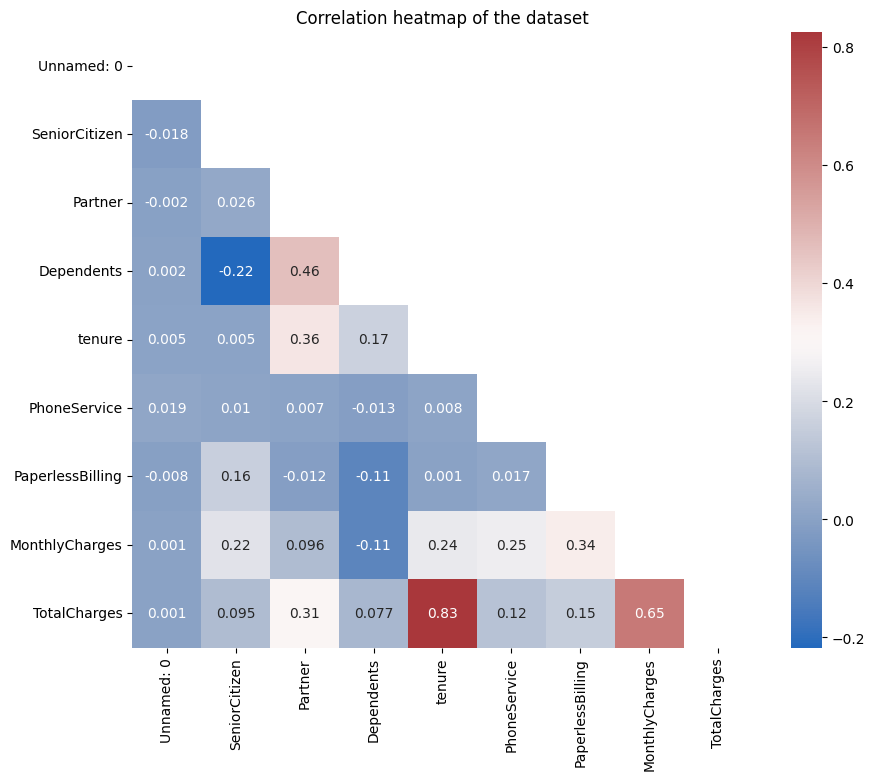

In [45]:
# Summarize the relationships between the variables with a heatmap of the correlations
correlation_matrix = df.corr(numeric_only= True).round(3)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='vlag',mask=mask)
plt.title("Correlation heatmap of the dataset")
plt.show()

In [46]:
df =Telcodata.drop(columns=['customerID','gender','TotalCharges','tenure Group',],axis=1)
df.head(10)

,Unnamed: 0,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,False,False,False,6,True,False,DSL,False,False,False,True,False,False,Month-to-month,True,Credit card (automatic),49.50,False
1,1,False,False,False,19,True,False,DSL,False,False,True,True,False,False,Month-to-month,True,Credit card (automatic),55.00,True
2,2,False,True,True,69,False,False,DSL,True,False,True,False,False,True,Two year,True,Credit card (automatic),43.95,False
3,3,False,True,True,11,True,True,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,74.35,True
4,4,False,True,False,64,True,True,Fiber optic,False,True,True,True,True,True,Month-to-month,True,Electronic check,111.15,False
5,5,False,True,False,39,True,False,Fiber optic,True,False,True,True,True,True,One year,True,Credit card (automatic),104.70,True
6,6,False,False,False,15,True,True,DSL,True,False,False,False,False,False,Month-to-month,True,Mailed check,55.70,True
7,7,False,False,False,25,True,False,False,False,False,False,False,False,False,Month-to-month,False,Mailed check,20.60,False
8,8,False,False,False,6,True,False,False,False,False,False,False,False,False,Two year,False,Credit card (automatic),19.65,False
9,9,False,True,False,66,True,True,Fiber optic,True,True,True,True,True,True,One year,False,Bank transfer (automatic),115.80,False


In [47]:
def str_convert(df,column_name):
    df[column_name]=df[column_name].replace({True: 'True', False: 'False'})

    return df

In [48]:
df=str_convert(df,"PaperlessBilling")
df=str_convert(df,"PhoneService")
df=str_convert(df,"SeniorCitizen")
df=str_convert(df,"Partner")
df=str_convert(df,"InternetService")
df=str_convert(df,"Dependents")

In [49]:
df["Churn"].unique().tolist()
df["Churn"]=df["Churn"].replace({True: '1', False: '0'})

#### `Distribution of the dependent variable`

##### STRATIFICATION ZONE

In [50]:
# Separate majority and minority classes
df_stay = df[df.Churn=='0']
df_left = df[df.Churn=='1']

print((len(df_stay)/len(df)),(len(df_left)/len(df)))
print(len(df_left))

0.7008256435162701 0.29917435648373
1232


##### Observation
- About 70% of the customers stayed as compared to the customers that left therefore the churned customers represent the minority group

In [51]:
# Downsample minority class
df_minority_upsampled = resample(df_left, 
                                 replace=True,     # sample with replacement
                                 n_samples=2886,    # to match majority class
                                 random_state=27) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_stay, df_minority_upsampled])


In [52]:
#Checking sample
df_upsampled.Churn.value_counts()

Churn
0    2886
1    2886
Name: count, dtype: int64

In [53]:
df.dtypes

Unnamed: 0            int64
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [54]:
df.head(3)

,Unnamed: 0,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,False,False,False,6,True,False,DSL,False,False,False,True,False,False,Month-to-month,True,Credit card (automatic),49.50,0
1,1,False,False,False,19,True,False,DSL,False,False,True,True,False,False,Month-to-month,True,Credit card (automatic),55.00,1
2,2,False,True,True,69,False,False,DSL,True,False,True,False,False,True,Two year,True,Credit card (automatic),43.95,0


In [55]:
# Looking at the descriptive statistics of the columns with categorical values
cats = [column for column in df.columns if (df[column].dtype == "O")]
print("Summary table of the Descriptive Statistics of Columns with Numeric Values")
df[cats].describe(include="all")


Summary table of the Descriptive Statistics of Columns with Numeric Values


,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118
unique,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,False,False,False,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,0
freq,3354,2105,2927,3898,2148,2247,2781,2507,2491,2745,2285,2263,2381,2649,1543,2886


In [56]:
# Looking at the descriptive statistics of the columns with numeric values
numerics = [column for column in df.columns if (df[column].dtype != "O")]
print("Summary table of the Descriptive Statistics of Columns with Numeric Values")
df[numerics].describe()


Summary table of the Descriptive Statistics of Columns with Numeric Values


,Unnamed: 0,tenure,MonthlyCharges
count,4118.000000,4118.000000,4118.000000
mean,2284.116804,32.853813,73.520435
std,1453.675485,24.534154,26.210337
min,0.000000,1.000000,18.550000
25%,1030.250000,9.000000,55.762500
50%,2070.000000,30.000000,78.950000
75%,3529.750000,56.000000,94.199997
max,5041.000000,72.000000,118.650002


In [57]:
# Create a boolean mask to identify boolean columns
boolean_mask = df.dtypes == bool

# Select columns with boolean values
boolean_columns = df.columns[boolean_mask]

# Display the selected columns
boolean_columns


Index([], dtype='object')

In [58]:
cats=df.select_dtypes('object').columns


In [59]:
numerics = df.select_dtypes('number').columns
numerics

Index(['Unnamed: 0', 'tenure', 'MonthlyCharges'], dtype='object')

In [60]:
cats

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [61]:
df.dtypes

Unnamed: 0            int64
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [62]:
cols= df.columns.tolist()
for col in cols:
        unique=df[col].unique().tolist()
        print(col,unique)

Unnamed: 0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220

In [63]:
X=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [64]:
for column in X.select_dtypes('object'):
    print(column)

SeniorCitizen
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod


In [65]:
X.columns

Index(['Unnamed: 0', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [66]:
X.dtypes

Unnamed: 0            int64
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
dtype: object

def str_(df):
    cols= df.columns.tolist()

    for col in cols:
        unique=df[col].unique().tolist()
        if len(unique)==2:
            df[col]= df[col].astype(str)
            print(col,unique)
    return df

X=str_(X)

In [67]:
cats=X.select_dtypes('object').columns

In [68]:
cats

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Check if dataset is balanced

In [69]:
class_distro = df['Churn'].value_counts().rename('Total').reset_index()
class_distro

,Churn,Total
0,0,2886
1,1,1232


In [70]:
class_distro['Ratio'] = class_distro['Total'].apply(lambda x: round((x/class_distro['Total'].sum() * 100),2))
class_distro

,Churn,Total,Ratio
0,0,2886,70.08
1,1,1232,29.92


Observation
Data is imbalanced

Spliting Data Into Training and Evaluation 

In [71]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [72]:
train_test_split(X,y, test_size=0.3, random_state=42)

[      Unnamed: 0 SeniorCitizen Partner Dependents  tenure PhoneService  \
 1589        1589         False    True      False      68         True   
 998          998         False    True      False      48         True   
 3591        3591         False    True       True      25         True   
 1955        1955         False   False      False      12         True   
 1133        1133         False   False      False       2        False   
 ...          ...           ...     ...        ...     ...          ...   
 4052        4052         False    True       True      70         True   
 467          467         False   False      False      53         True   
 3535        3535          True   False      False      19         True   
 4514        4514         False    True      False      53         True   
 861          861         False   False      False      35         True   
 
      MultipleLines InternetService OnlineSecurity OnlineBackup  \
 1589          True           F

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=27,stratify=y)

In [74]:
encoder =LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)

y_test_encoded = encoder. transform(y_test)






Preparing Pipelines

In [75]:
robust_sacler = RobustScaler()
r_scaled = robust_sacler.fit_transform(X.select_dtypes('number'))
r_scaled_df = pd.DataFrame(r_scaled, columns=X.select_dtypes('number').columns)

In [76]:
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder()),
    
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerics),
    ('cat_pipeline', categorical_pipeline, cats)
])

Modelling

In [77]:
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
     ('KNN', KNeighborsClassifier(n_neighbors=5)),
      ('Random Forest', RandomForestClassifier(random_state=42)),
    
]

In [78]:
all_pipelines = {}

metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

for model_name, classifier in models:

    #creating final pipeline with preprocessor estimator
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

     #Fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded)

    #Add all pipelines into the all_pipeline dictionary
    all_pipelines[model_name] = final_pipeline

    #Predicting on test set
    y_pred = final_pipeline.predict(X_test)

    #Generate classification report fo each pipeline or model
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
 
    #Grab all important metrics
    accuracy =metrics['accuracy']
    precision = metrics ['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics ['weighted avg']['f1-score']
    
    metric_table.loc[len(metric_table)] = [model_name, accuracy,precision,recall,f1]
    metric_table
    






In [79]:
metric_table.sort_values(by='f1_score', ascending=False)


,model_name,accuracy,precision,recall,f1_score
1,Logistic Regression,0.775619,0.770145,0.775619,0.772161
3,Random Forest,0.764449,0.753892,0.764449,0.755877
2,KNN,0.723167,0.725527,0.723167,0.724291
0,Decision_Tree,0.716853,0.717514,0.716853,0.717179


In [80]:
# Create a function to model and return comparative model evaluation scores
# Function to calculate and compare accuracy
def evaluate_models(models=all_pipelines, X_test=X_test, y_test=y_test):
    # Key imports
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

    # Dictionary for trained models
    trained_models = dict()
    
    i = 1
    
    # List to receive scores
    performances = []
    for name, model in models.items():

        # Fit model to training data
        model = model.fit(X_train,  y_train)

        # Predict and calculate performance scores
        y_pred = model.predict(X_test)
        performances.append([name,
                             accuracy_score(y_test, y_pred),  # accuracy
                             precision_score(y_test, y_pred, average="weighted"),  # precisions
                             recall_score(y_test, y_pred,average="weighted"),  # recall
                             f1_score(y_test, y_pred, average="weighted")
                             ])

        # Print classification report
        model_report = classification_report(y_test, y_pred)
        print("This is the classification report of the",name, "model", "\n", model_report, "\n")

        # Defining the Confusion Matrix
        model_conf_mat = confusion_matrix(y_test, y_pred)
        model_conf_mat = pd.DataFrame(model_conf_mat).reset_index(drop=True)
        print(f"Below is the confusion matrix for the {name} model")

        # Visualizing the Confusion Matrix
        f, ax = plt.subplots()
        sns.heatmap(model_conf_mat, annot=True, linewidth=1.0,fmt=".0f", cmap="RdPu", ax=ax)
        plt.xlabel = ("Prediction")
        plt.ylabel = ("Actual")
        plt.show()

        # Store trained model
        trained_model_name = "trained_" + str(name).lower()
        trained_models[trained_model_name] = model
        
        print("\n", "-----   -----"*6, "\n",  "-----   -----"*6)
    
    # Compile accuracy
    df_compare = pd.DataFrame(performances, columns=["model", "accuracy", "precision", "recall", "f1_score"])
    df_compare.set_index("model", inplace=True)
    df_compare.sort_values(by=["f1_score", "accuracy"], ascending=False, inplace=True)
    return df_compare, trained_models

This is the classification report of the Decision_Tree model 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1443
           1       0.53      0.53      0.53       616

    accuracy                           0.72      2059
   macro avg       0.66      0.66      0.66      2059
weighted avg       0.72      0.72      0.72      2059
 

Below is the confusion matrix for the Decision_Tree model


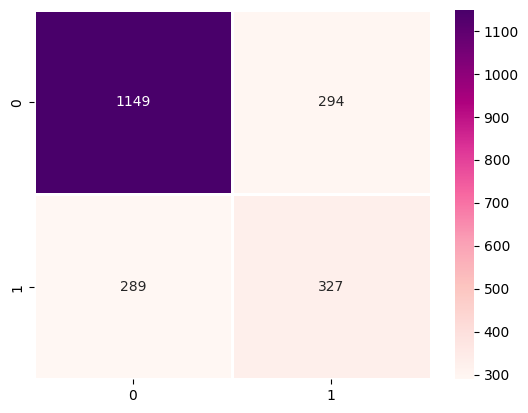


 -----   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   -----
This is the classification report of the Logistic Regression model 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1443
           1       0.64      0.58      0.61       616

    accuracy                           0.78      2059
   macro avg       0.73      0.72      0.72      2059
weighted avg       0.77      0.78      0.77      2059
 

Below is the confusion matrix for the Logistic Regression model


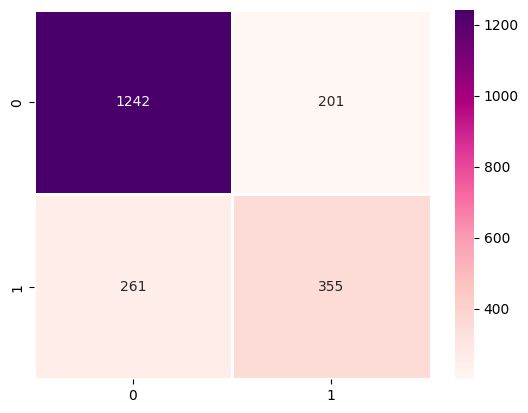


 -----   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   -----
This is the classification report of the KNN model 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1443
           1       0.54      0.55      0.54       616

    accuracy                           0.72      2059
   macro avg       0.67      0.67      0.67      2059
weighted avg       0.73      0.72      0.72      2059
 

Below is the confusion matrix for the KNN model


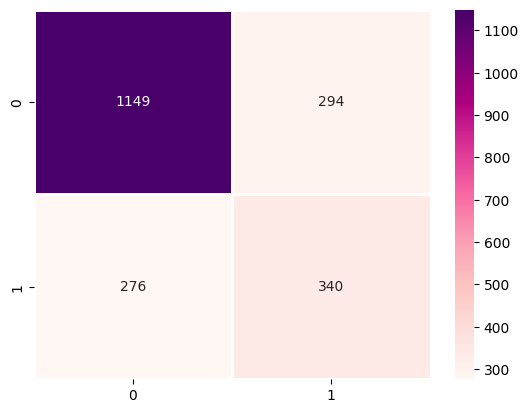


 -----   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   -----
This is the classification report of the Random Forest model 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1443
           1       0.63      0.50      0.56       616

    accuracy                           0.76      2059
   macro avg       0.72      0.69      0.70      2059
weighted avg       0.75      0.76      0.76      2059
 

Below is the confusion matrix for the Random Forest model


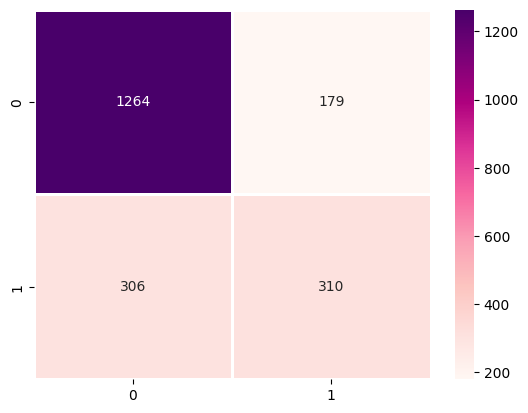


 -----   ----------   ----------   ----------   ----------   ----------   ----- 
 -----   ----------   ----------   ----------   ----------   ----------   -----


,accuracy,precision,recall,f1_score
model,,,,
Logistic Regression,0.775619,0.770145,0.775619,0.772161
Random Forest,0.764449,0.753892,0.764449,0.755877
KNN,0.723167,0.725527,0.723167,0.724291
Decision_Tree,0.716853,0.717514,0.716853,0.717179


In [81]:
# Run the function to train models and return performances
all_models_eval, trained_models = evaluate_models()
all_models_eval

In [82]:
#### HYPERPARAMETER TUNING
#
#
#
X_train

,Unnamed: 0,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
912,912,True,False,False,47,True,True,Fiber optic,False,True,True,False,False,False,Month-to-month,True,Bank transfer (automatic),85.200000
2160,2160,False,True,True,10,True,True,Fiber optic,True,False,False,False,True,True,Month-to-month,True,Electronic check,100.250000
65,65,True,False,False,33,True,True,False,False,False,False,False,False,False,One year,True,Bank transfer (automatic),24.900000
711,711,True,True,False,20,True,True,Fiber optic,False,False,True,False,True,False,Month-to-month,False,Electronic check,90.800000
415,415,False,False,False,18,True,True,DSL,False,False,False,False,False,False,Month-to-month,True,Electronic check,50.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,2301,False,True,False,2,True,False,DSL,False,False,False,False,False,False,Month-to-month,True,Credit card (automatic),44.599998
336,336,False,False,False,1,True,False,False,False,False,False,False,False,False,Month-to-month,False,Mailed check,19.100000
1795,1795,False,True,True,55,True,True,Fiber optic,True,True,False,False,False,False,Month-to-month,True,Electronic check,85.100000
3245,3245,False,True,False,53,True,False,Fiber optic,False,True,False,False,True,True,One year,True,Bank transfer (automatic),94.250000


In [87]:
processed = preprocessor.transform(X_train)
#new_data=processed.transform(X_train)
processed

array([[-0.43214705,  0.36170213,  0.17715012, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05592491, -0.42553191,  0.56354295, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7633946 ,  0.06382979, -1.37098858, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08682049,  0.53191489,  0.17458273, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.48025029,  0.4893617 ,  0.4094993 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08877591,  0.78723404, -1.35301682, ...,  0.        ,
         0.        ,  0.        ]])

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [85]:
## Logregression
log_reg = Pipeline(steps=[("preprocessor", preprocessor), 
                          ("model", LogisticRegression(random_state=26))])

# Defining the values for the RandomizedSearchCV
random_grid = {"model__learning_rate": [0.1, 0.3, 0.5, 0.7, 1.0],
               "model__max_depth": [5, 10, 15, 20, 25, 30, 35],
               "model__booster": ["gbtree", "gblinear", "dart"],
               "model__n_estimators": [5, 10, 20, 50, 80, 100]
              }

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming 'log_mod' is your LogisticRegression model instance
log_mod = LogisticRegression(random_state=26)

# If preprocessing is needed, define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Example of preprocessing step
    ('log_mod', log_mod)  # LogisticRegression as the estimator in the pipeline
])

# Define the parameter grid for GridSearchCV
params = {
    'log_mod__C': [0.1, 1.0, 10.0],  # Example values for regularization parameter C
    'log_mod__solver': ['liblinear', 'lbfgs']  # Example solvers to consider
    # Add more parameters as needed
}

# Create GridSearchCV instance
log_cv_model = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, n_jobs=-1)

# Fit the GridSearchCV instance on the processed data and y_train
log_cv_model.fit(processed, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_mod',
                                        LogisticRegression(random_state=26))]),
             n_jobs=-1,
             param_grid={'log_mod__C': [0.1, 1.0, 10.0],
                         'log_mod__solver': ['liblinear', 'lbfgs']})

In [100]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (2059, 18)
X_test shape: (2059, 18)


In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming 'dectree_cf' is your DecisionTreeClassifier model instance
dectree_cf = DecisionTreeClassifier(random_state=26)

# Define the pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Example of preprocessing step
    ('dectree_cf', dectree_cf)     # DecisionTreeClassifier as the estimator in the pipeline
])

# Define the parameter grid for GridSearchCV
params = {
    'dectree_cf__max_depth': [None, 10, 20, 30],  # Example values for max_depth
    'dectree_cf__min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    # Add more parameters as needed
}

# Create GridSearchCV instance
tree_cv_model = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, n_jobs=-1)

# Fit the GridSearchCV instance on the processed data and y_train
tree_cv_model.fit(processed, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dectree_cf',
                                        DecisionTreeClassifier(random_state=26))]),
             n_jobs=-1,
             param_grid={'dectree_cf__max_depth': [None, 10, 20, 30],
                         'dectree_cf__min_samples_split': [2, 5, 10]})

In [108]:
import joblib

# Assuming log_cv_model is your trained GridSearchCV instance
joblib.dump(log_cv_model, 'model.pkl')


['model.pkl']

In [109]:
loaded_model = joblib.load('model.pkl')


In [111]:
import joblib

# Assuming log_cv_model is your trained GridSearchCV instance
joblib.dump(tree_cv_model, 'model.pkl')


['model.pkl']